In [1]:
!pip install torch
!pip install g-mlp-pytorch
!pip install pytorch-model-summary
!pip install area_attention
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=2cb4a93e1e430f8d072315d0916df79fe73f265191ddfbb4c5bcb2883e4289f5
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/devanshir21/GLAM.git
%cd GLAM

Cloning into 'GLAM'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 102 (delta 36), reused 76 (delta 29), pack-reused 13 (from 1)
Receiving objects: 100% (102/102), 6.82 MiB | 21.36 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/GLAM


In [4]:
!unzip "/content/drive/MyDrive/IEMOCAP_S2.zip"

Streaming output truncated to the last 5000 lines.
  inflating: IEMOCAP_S2/Session2/sentences/ForcedAlignment/Ses02M_impro07/Ses02M_impro07_M019.stseg  
  inflating: __MACOSX/IEMOCAP_S2/Session2/sentences/ForcedAlignment/Ses02M_impro07/._Ses02M_impro07_M019.stseg  
  inflating: IEMOCAP_S2/Session2/sentences/ForcedAlignment/Ses02M_impro07/Ses02M_impro07_M030.wdseg  
  inflating: __MACOSX/IEMOCAP_S2/Session2/sentences/ForcedAlignment/Ses02M_impro07/._Ses02M_impro07_M030.wdseg  
  inflating: IEMOCAP_S2/Session2/sentences/ForcedAlignment/Ses02M_impro07/Ses02M_impro07_M016.syseg  
  inflating: __MACOSX/IEMOCAP_S2/Session2/sentences/ForcedAlignment/Ses02M_impro07/._Ses02M_impro07_M016.syseg  
  inflating: IEMOCAP_S2/Session2/sentences/ForcedAlignment/Ses02M_impro07/Ses02M_impro07_F026.phseg  
  inflating: __MACOSX/IEMOCAP_S2/Session2/sentences/ForcedAlignment/Ses02M_impro07/._Ses02M_impro07_F026.phseg  
  inflating: IEMOCAP_S2/Session2/sentences/ForcedAlignment/Ses02M_impro07/Ses02M_impro07_

In [5]:
!python handleIEMOCAP.py

Starting...


In [6]:
!python seeds.py

In [7]:
!bash run > output.txt

100% 320/320 [00:33<00:00,  9.55it/s]
100% 80/80 [00:09<00:00,  8.70it/s]
6208it [00:29, 214.02it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

Metric                  Average
epoch                   24.5000
lr                       0.0004
loss                     0.4018
WA                      89.4250
UA                      87.1642
macro_f1                88.4676
weighted_f1             88.8997

Average Confusion Matrix:
 [[3.05405405 5.         1.2972973  3.45945946]
 [2.72972973 4.94594595 1.35135135 3.40540541]
 [2.94594595 5.02702703 1.21621622 3.56756757]
 [2.62162162 5.54054054 1.35135135 3.2972973 ]]


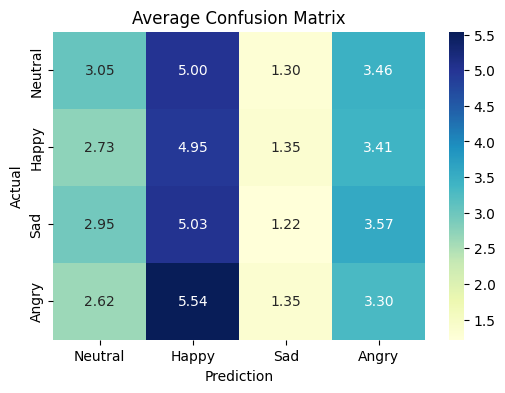

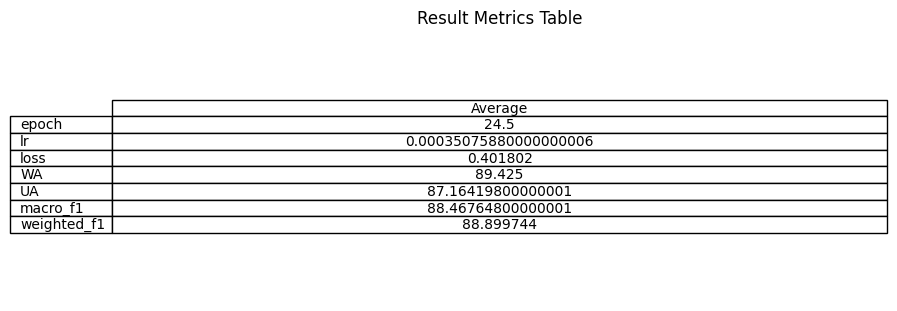

In [8]:
import re
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the output file
with open('output.txt', 'r') as f:
    log_text = f.readlines()

# Initialize storage for each metric
metrics = defaultdict(list)
confusion_matrices = []

# Define regex patterns to extract metrics and confusion matrices
epoch_pattern = re.compile(r'epoch: (\d+), lr: ([\d.e-]+), loss: ([\d.]+)')
metrics_pattern = re.compile(r'(\w+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+(\d+)')
wa_pattern = re.compile(r'WA:\s*([\d.]+)%')
ua_pattern = re.compile(r'UA:\s*([\d.]+)%')
macro_f1_pattern = re.compile(r'macro f1:\s*([\d.]+)%')
weighted_f1_pattern = re.compile(r'weighted f1:\s*([\d.]+)%')

# Variable to accumulate rows of a confusion matrix
current_matrix = []

# Parse the output file line by line
for line in log_text:
    # Match and extract epoch, learning rate, and loss
    epoch_match = epoch_pattern.match(line)
    if epoch_match:
        epoch, lr, loss = epoch_match.groups()
        metrics['epoch'].append(int(epoch))
        metrics['lr'].append(float(lr))
        metrics['loss'].append(float(loss))

    # Match and extract class-based metrics
    metrics_match = metrics_pattern.match(line)
    if metrics_match:
        label, precision, recall, f1_score, support = metrics_match.groups()
        metrics[f'{label}_precision'].append(float(precision))
        metrics[f'{label}_recall'].append(float(recall))
        metrics[f'{label}_f1_score'].append(float(f1_score))
        metrics[f'{label}_support'].append(int(support))

    # Match and extract WA, UA, macro f1, and weighted f1
    wa_match = wa_pattern.search(line)
    if wa_match:
        metrics['WA'].append(float(wa_match.group(1)))

    ua_match = ua_pattern.search(line)
    if ua_match:
        metrics['UA'].append(float(ua_match.group(1)))

    macro_f1_match = macro_f1_pattern.search(line)
    if macro_f1_match:
        metrics['macro_f1'].append(float(macro_f1_match.group(1)))

    weighted_f1_match = weighted_f1_pattern.search(line)
    if weighted_f1_match:
        metrics['weighted_f1'].append(float(weighted_f1_match.group(1)))

    # Detect confusion matrix rows (4 values in square brackets)
    matrix_row_match = re.match(r'\[\s*(\d+)\s+(\d+)\s+(\d+)\s+(\d+)\s*\]', line.strip())
    if matrix_row_match:
        current_matrix.append(list(map(int, matrix_row_match.groups())))
        # If we have 4 rows, it's a complete 4x4 matrix
        if len(current_matrix) == 4:
            confusion_matrices.append(np.array(current_matrix))
            current_matrix = []  # Reset for the next matrix

# Check if any confusion matrices were found
if confusion_matrices:
    # Calculate the average confusion matrix
    average_confusion_matrix = sum(confusion_matrices) / len(confusion_matrices)
else:
    average_confusion_matrix = None

# Compute averages for other metrics
averaged_metrics = {metric: np.mean(values) for metric, values in metrics.items()}

# Display the averaged metrics
print(f"{'Metric':<20} {'Average':>10}")
print("=" * 30)
for metric, avg in averaged_metrics.items():
    print(f"{metric:<20} {avg:>10.4f}")

# Display the average confusion matrix if it exists
if average_confusion_matrix is not None:
    print("\nAverage Confusion Matrix:\n", average_confusion_matrix)
    # Visualize the average confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(average_confusion_matrix, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=['Neutral', 'Happy', 'Sad', 'Angry'], yticklabels=['Neutral', 'Happy', 'Sad', 'Angry'])
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.title("Average Confusion Matrix")
    plt.show()
else:
    print("No confusion matrices found in the output file.")

# Generate a DataFrame for averaged metrics to create a table
metrics_df = pd.DataFrame(averaged_metrics, index=[0]).T
metrics_df.columns = ["Average"]

# Plot the metrics table as an image
plt.figure(figsize=(10, len(metrics_df) * 0.5))
plt.axis('off')
plt.table(cellText=metrics_df.values, colLabels=metrics_df.columns, rowLabels=metrics_df.index, cellLoc="center", loc="center")
plt.title("Result Metrics Table")
plt.show()